In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [8]:
df = pd.read_csv('hour.csv')

In [13]:
df.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [33]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [16]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [36]:
# checking duplicates

duplicate = df.duplicated()
df = df.drop_duplicates(subset=['dteday', 'hr'])
df[df.duplicated(['dteday', 'hr'])]
print(duplicate.sum())

0


In [39]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [41]:
#renaming columns
df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [42]:
# categorical variables
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['workingday'] = df.workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rec_id             17379 non-null  int64   
 1   datetime           17379 non-null  object  
 2   season             17379 non-null  category
 3   year               17379 non-null  category
 4   month              17379 non-null  category
 5   hour               17379 non-null  category
 6   holiday            17379 non-null  category
 7   weekday            17379 non-null  category
 8   workingday         17379 non-null  category
 9   weather_condition  17379 non-null  category
 10  temp               17379 non-null  float64 
 11  atemp              17379 non-null  float64 
 12  humidity           17379 non-null  float64 
 13  windspeed          17379 non-null  float64 
 14  casual             17379 non-null  int64   
 15  registered         17379 non-null  int64   
 16  tota

In [130]:
df.shape

(17379, 17)

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


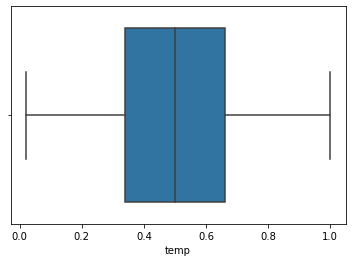

In [124]:
sns.boxplot(df['temp']);

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


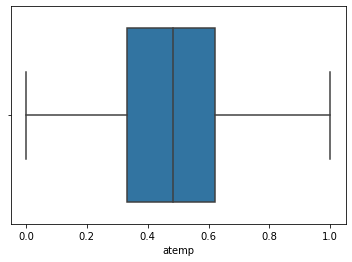

In [123]:
sns.boxplot(df['atemp']);

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humidity'>

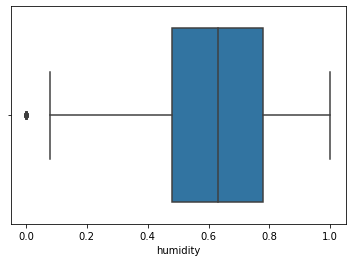

In [120]:
sns.boxplot(df['humidity'])

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


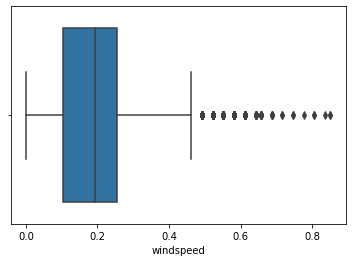

In [152]:
sns.boxplot(df['windspeed']);

In [145]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR
    
    ls = df.index[ (df[ft] <lower_limit) | (df[ft] >upper_limit)]
    
    return ls

In [146]:
index_list = []
for feature in ['humidity','windspeed']:
    index_list.extend(outliers(df, feature))

In [147]:
index_list

[1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 175,
 178,
 194,
 196,
 265,
 271,
 467,
 468,
 469,
 728,
 729,
 730,
 731,
 736,
 861,
 862,
 863,
 865,
 869,
 870,
 962,
 1006,
 1007,
 1009,
 1010,
 1011,
 1013,
 1014,
 1015,
 1017,
 1018,
 1019,
 1105,
 1107,
 1110,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1130,
 1131,
 1132,
 1136,
 1137,
 1138,
 1258,
 1259,
 1261,
 1262,
 1264,
 1323,
 1332,
 1333,
 1379,
 1380,
 1383,
 1384,
 1389,
 1475,
 1477,
 1482,
 1483,
 1568,
 1611,
 1767,
 1773,
 1873,
 2124,
 2153,
 2154,
 2155,
 2156,
 2157,
 2159,
 2167,
 2171,
 2172,
 2177,
 2181,
 2184,
 2200,
 2321,
 2322,
 2323,
 2326,
 2339,
 2345,
 2418,
 2438,
 2439,
 2440,
 2441,
 2443,
 2465,
 2551,
 2552,
 2554,
 2705,
 2846,
 2847,
 2848,
 2861,
 2895,
 2897,
 3328,
 3564,
 3570,
 3571,
 3821,
 4315,
 4316,
 4523,
 5048,
 5155,
 5327,
 5328,
 5443,

In [148]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df 

In [149]:
df_cleand = remove(df, index_list)

In [150]:
df_cleand.shape

(17016, 17)

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


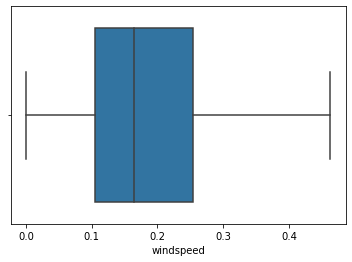

In [151]:
sns.boxplot(df_cleand['windspeed']);

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


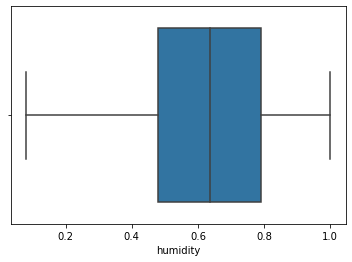

In [153]:
sns.boxplot(df_cleand['humidity']);

 # Train test split

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [168]:
df_train.shape

(13034, 17)

In [169]:
df_test.shape

(4345, 17)

In [170]:
df_train.head()

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
14109,14110,2012-08-16,3,1,8,2,0,4,1,1,0.64,0.6061,0.69,0.1940,0,15,15
6376,6377,2011-09-28,4,0,9,6,0,3,1,3,0.60,0.5152,0.94,0.1642,3,111,114
3457,3458,2011-05-28,2,0,5,23,0,6,0,1,0.64,0.5758,0.83,0.1940,44,81,125
13351,13352,2012-07-15,3,1,7,12,0,0,0,1,0.84,0.7727,0.47,0.1045,153,336,489
13956,13957,2012-08-09,3,1,8,17,0,4,1,1,0.86,0.7576,0.36,0.2537,111,699,810


In [177]:
x_train = df_train.drop(columns=["temp", "datetime", "casual", "registered"]).values

In [178]:
x_train

array([[1.411e+04, 3.000e+00, 1.000e+00, ..., 6.900e-01, 1.940e-01,
        1.500e+01],
       [6.377e+03, 4.000e+00, 0.000e+00, ..., 9.400e-01, 1.642e-01,
        1.140e+02],
       [3.458e+03, 2.000e+00, 0.000e+00, ..., 8.300e-01, 1.940e-01,
        1.250e+02],
       ...,
       [6.951e+03, 4.000e+00, 0.000e+00, ..., 6.600e-01, 0.000e+00,
        8.000e+00],
       [9.903e+03, 1.000e+00, 1.000e+00, ..., 3.100e-01, 4.179e-01,
        1.950e+02],
       [5.139e+03, 3.000e+00, 0.000e+00, ..., 8.400e-01, 2.836e-01,
        8.000e+01]])

In [181]:
y_train = df_train["total_count"].values

In [182]:
y_train

array([ 15, 114, 125, ...,   8, 195,  80])

In [222]:
df["season"]

0        1
1        1
2        1
3        1
4        1
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: season, Length: 17379, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [230]:
def single_fratures_pridiction(atemp):
    if atemp < 0.19:
        return 0
    elif atemp < 0.33:
        return 1
    else:
        return 2

In [231]:
df_train.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [232]:
x_train[:,12]

array([ 15., 114., 125., ...,   8., 195.,  80.])

In [234]:
manual_y_predictions=np.array[single_feature_prediction(val)for val in x_train[:,12]]

SyntaxError: invalid syntax (<ipython-input-234-99ecb7f5d364>, line 1)

In [235]:
np.mean(manual-y-pridictions==y_train)

NameError: name 'manual' is not defined

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


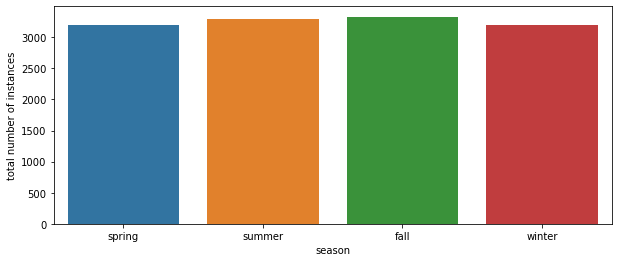

In [186]:
seasons = ['spring', 'summer', 'fall', 'winter']
# Let's check if the data is skewed / biased towards any given season

plt.figure(figsize=(10, 4))
ax = sns.countplot('season', data=df_train)
ax.set_xticklabels(seasons)
ax.set_ylabel('total number of instances')

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


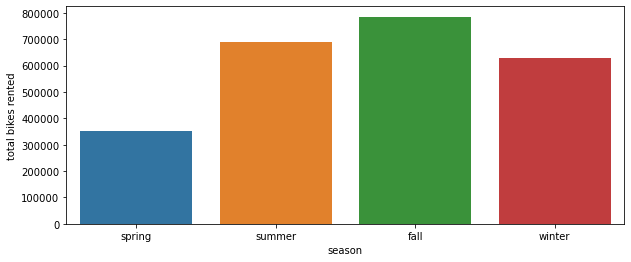

In [189]:
#demand in seasons
plt.figure(figsize=(10, 4))

ax = sns.barplot('season', 'total_count', data=df_train, estimator=sum, ci=None)
ax.set_xticklabels(seasons)
ax.set_ylabel('total bikes rented')

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


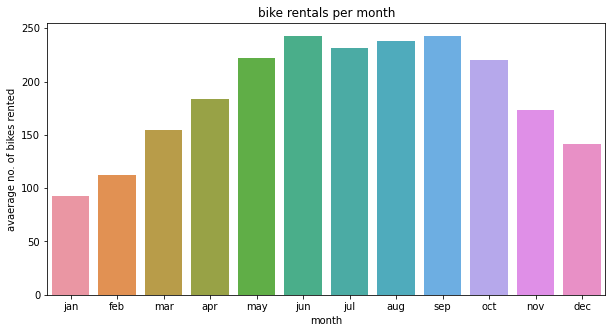

In [190]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
plt.figure(figsize=(10, 5))
ax = sns.barplot('month', 'total_count', data=df_train, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)

plt.title('bike rentals per month')

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


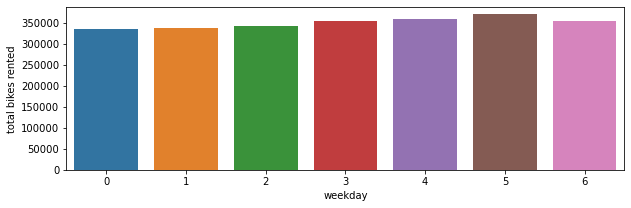

In [203]:
plt.figure(figsize=(10, 3))
ax = sns.barplot('weekday', 'total_count', data=df_train, estimator=sum, ci=None)

ax.set_ylabel('total bikes rented')
ax.set_xlabel('weekday')

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


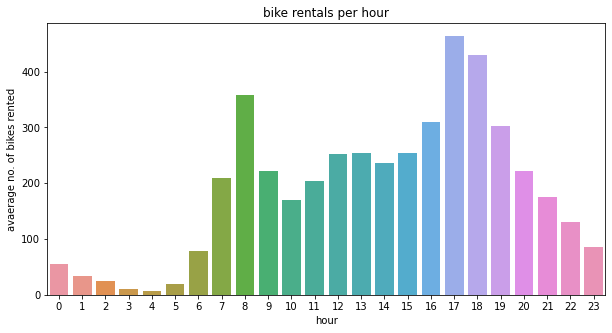

In [214]:
#months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
plt.figure(figsize=(10, 5))
ax = sns.barplot('hour', 'total_count', data=df_train, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('hour')

plt.title('bike rentals per hour')

plt.show()

In [216]:
#plt.figure(figsize=(9, 10))

#labels = list(range(24))
#sizes = df_train.total_count.groupby(df_train.hour).sum().tolist()
# colors = ['gold', '#eeefff', 'white', 'black']
#explode = np.zeros(24)
#explode[17] = 0.15
#explode[18] = 0.1

#plt.pie(sizes, labels=labels, shadow=True, startangle=90, pctdistance=.9, explode=explode,
       # autopct='%1.1f%%',  counterclock=False, labeldistance=1.04)

# Set aspect ratio to be equal so that pie is drawn as a circle.
#plt.axis('equal')
#plt.title('Hourly bike usage')
#plt.show()

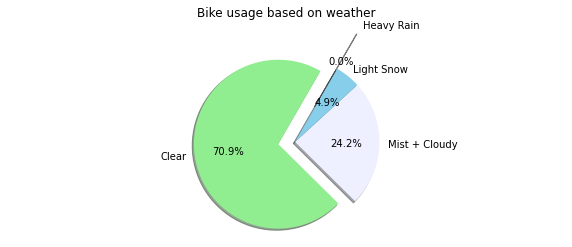

In [209]:
plt.figure(figsize=(10, 4))

labels = 'Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'
sizes = df_train.total_count.groupby(df_train.weather_condition).sum().tolist()
colors = ['lightgreen', '#eeefff', 'skyblue', 'black']
explode = (0.2, 0, 0, 0.5)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()